<a href="https://colab.research.google.com/github/dartyourt/finalprosic24/blob/main/scalp_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt

In [16]:
original_dir = '/content/drive/MyDrive/Dataset-Image'
simplified_dir = '/content/drive/MyDrive/Dataset-Simplified'

os.makedirs(simplified_dir, exist_ok=True)

category_mapping = {
    'alopecia-areata': ['alopecia-areata', 'alopecia-areata-atlas'],
    'seborrhoeic-dermatitis': ['seborrhoeic-dermatitis'],
    'scalp-psoriasis': ['scalp-psoriasis-dermaamin', 'scalp-psoriasis'],
    'tinea-capitis': ['tinea-capitis', 'tinea-capitis-atlas'],
    'normal': ['normal']
}

for new_category, old_categories in category_mapping.items():
    new_category_dir = os.path.join(simplified_dir, new_category)
    os.makedirs(new_category_dir, exist_ok=True)
    for old_category in old_categories:
        old_category_dir = os.path.join(original_dir, old_category)
        for filename in os.listdir(old_category_dir):
            shutil.copy(os.path.join(old_category_dir, filename), os.path.join(new_category_dir, filename))


In [23]:
data_dir = '/content/drive/MyDrive/Dataset-Simplified'
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # Memisahkan 20% data untuk validasi
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 459 images belonging to 5 classes.
Found 112 images belonging to 5 classes.


In [18]:
import os
import pandas as pd
categories = os.listdir(data_dir)
data = {'Category': [], 'Number of Images': []}

for category in categories:
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        num_images = len(os.listdir(category_dir))
        data['Category'].append(category)
        data['Number of Images'].append(num_images)

df = pd.DataFrame(data)
print(df)

                 Category  Number of Images
0         alopecia-areata               133
1  seborrhoeic-dermatitis               102
2           tinea-capitis                74
3                  normal               200
4         scalp-psoriasis                62


# CREATE MODEL

In [24]:
# Create CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 8 kategori
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

di bawah ini training...

In [25]:
import tensorflow as tf

epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    validation_data=validation_generator,
    epochs=epochs)


Epoch 1/20
14/14 [==============================] - 26s 2s/step - loss: 1.6381 - accuracy: 0.3372 - val_loss: 1.4638 - val_accuracy: 0.4375
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 1.2550 - accuracy: 0.5012 - val_loss: 1.3279 - val_accuracy: 0.4896
Epoch 3/20
14/14 [==============================] - 24s 2s/step - loss: 1.0389 - accuracy: 0.5972 - val_loss: 1.4618 - val_accuracy: 0.4896
Epoch 4/20
14/14 [==============================] - 24s 2s/step - loss: 0.9100 - accuracy: 0.5972 - val_loss: 1.3338 - val_accuracy: 0.5521
Epoch 5/20
14/14 [==============================] - 25s 2s/step - loss: 0.8523 - accuracy: 0.6417 - val_loss: 1.9495 - val_accuracy: 0.4896
Epoch 6/20
14/14 [==============================] - 23s 2s/step - loss: 0.8011 - accuracy: 0.6885 - val_loss: 1.6034 - val_accuracy: 0.4479
Epoch 7/20
14/14 [==============================] - 24s 2s/step - loss: 0.7659 - accuracy: 0.6838 - val_loss: 1.3577 - val_accuracy: 0.4896
Epoch 8/20
14/14 [==

evaluasi model

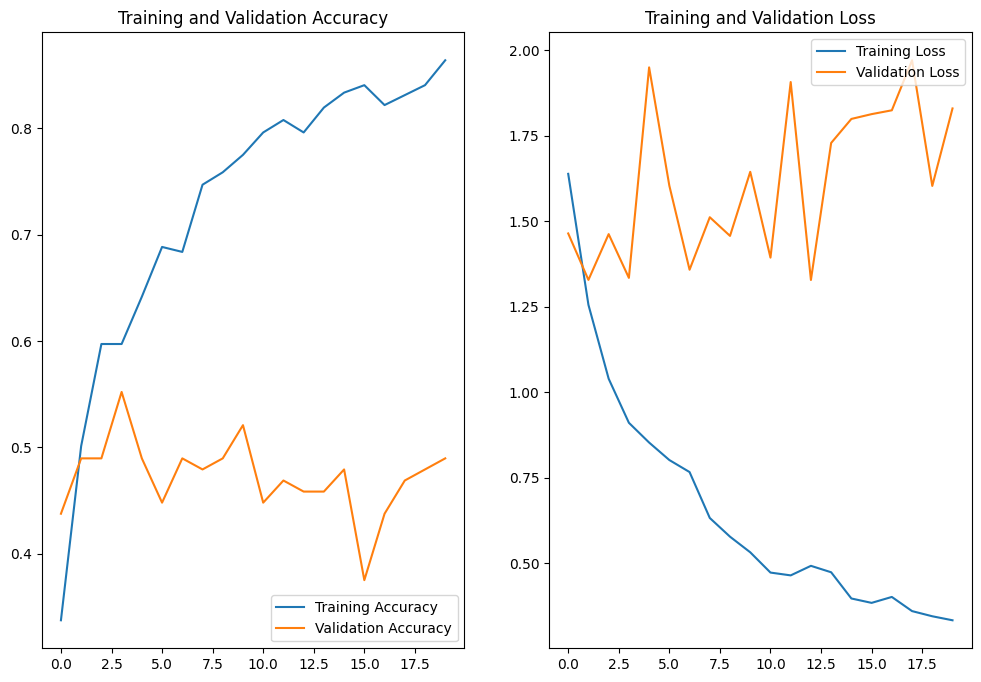

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
# save the Model that had created
model.save('scalp_condition_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# MODEL PREDICT

Found 5 images belonging to 1 classes.
5/5 [==============================] - 2s 441ms/step
Image: ./healthy2.jpg, Predicted Label: normal
Image: ./kepala sehat.jpg, Predicted Label: normal
Image: ./scalp1.png, Predicted Label: tinea-capitis
Image: ./scalp_image.jpg, Predicted Label: seborrhoeic-dermatitis
Image: ./sehat_scalp.jpg, Predicted Label: normal


IndexError: list index out of range

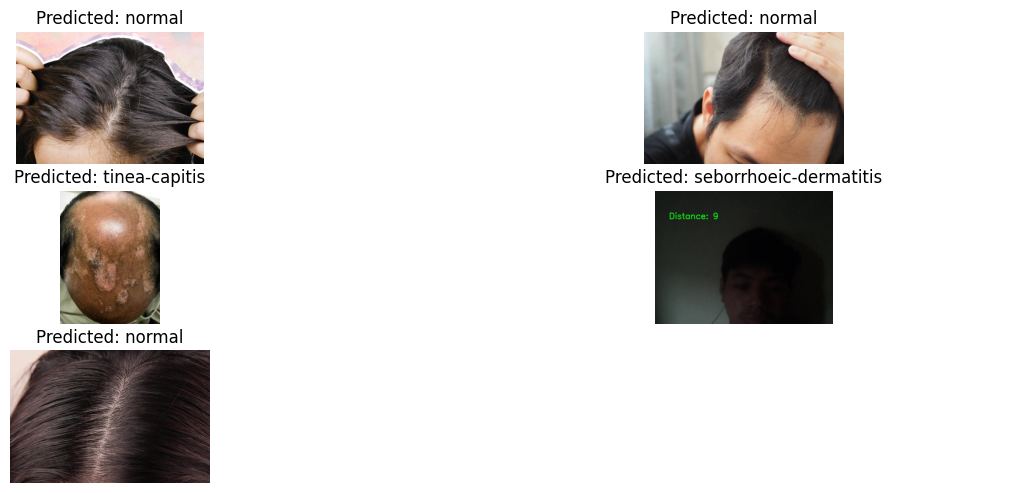

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the directory containing the images for prediction
unlabeled_dir = '/content/drive/MyDrive/datatrain'  # Update this path

# Load the pre-trained model
model = load_model('scalp_condition_classifier_model.h5')

# Image data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    unlabeled_dir,
    target_size=(img_height, img_width),
    batch_size=1,  # Set batch size to 1 for prediction
    class_mode=None,  # No labels
    shuffle=False,
    classes=['.']  # Trick to avoid needing subfolders
)

# Predict on test data
test_predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
test_predicted_classes = np.argmax(test_predictions, axis=1)

# Mapping from class index to class label
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_labels = [class_indices[idx] for idx in test_predicted_classes]

# Print the predicted labels for the test images
filenames = test_generator.filenames
for filename, label in zip(filenames, predicted_labels):
    print(f"Image: {filename}, Predicted Label: {label}")

# Optional: Visualize some predictions
def plot_images_with_predictions(test_generator, predictions, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(5, 2, i + 1)
        plt.axis('off')
        img_path = os.path.join(unlabeled_dir, test_generator.filenames[i])
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f"Predicted: {predictions[i]}")
    plt.show()

plot_images_with_predictions(test_generator, predicted_labels)
